# Exploratory Data Analysis

### Project Title:

- Financial Fraud Dataset - Basic Pipeline 
### EDA goal:
The goal of performing exploratory data analysis on this dataset of financial transactions is to better understand the patterns behind fraudulent activities. Gaining insight into how fraud appears in the data will help me clean and prepare the dataset for machine learning. This analysis will also guide future modeling strategies by showing which features are most informative and which ones may be irrelevant. The challenge is to understand the data well enough to then use machine learning model to help keep false positives to a minimum.





# List of columns in dataset:

- **Step**: A unit of time (in hours) from the start of data collection (e.g., hour 1 to hour 743).
- **Type**: Type of transaction (e.g., `TRANSFER`, `CASH_OUT`, `DEBIT`).
- **Amount**: Amount of money transferred in the transaction.
- **NameOrig**: Identifier for the origin account.
- **OldBalanceOrg**: Origin account's balance before the transaction.
- **NewBalanceOrg**: Origin account's balance after the transaction.
- **NameDest**: Identifier for the destination account.
- **OldbalanceDest**: Destination account's balance before the transaction.
- **NewbalanceDest**: Destination account's balance after the transaction.
- **IsFlaggedFraud**: A basic flag — set to 1 if the transaction amount is greater than 200,000.
- **IsFraud**: Indicates whether the transaction is actually fraudulent.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset from csv
df = pd.read_csv("/Users/sa21/Desktop/Financial-Fraud-Project/data/Raw/PS_20174392719_1491204439457_log.csv")
df.head() #first 5 rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


From looking at the summary statistics there is extreme class imbalance in the isFraud column and the isFlaggedFraud. The mean of isFraud is 0.00129 meaning only a very small ammount of the transactions are labeled as fraud. The mean of isFlaggedFraud is 0.0000025 and none of the transactions were flagged beforehand, the flagging system seems weak.
There is also highly skewed transaction amounts, with many balances at zero, which may indicate suspicious behavior.

In [5]:
#Dataset shape
df.shape

(6362620, 11)

In [6]:
#features names
col_names = df.columns

col_names

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Univariate Exploratory Analysis

To start, the first feature I wanted to explore was the step column to understand the distribution of transactions throughout the dataset. The step column goes up to around 700–800, which represents approximately 33.3 days. This means the dataset covers about one month of transaction activity.

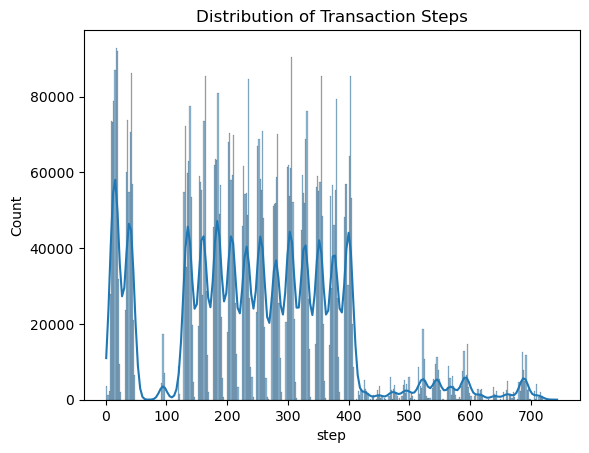

In [8]:
#plotting histogram of 'step' column 
sns.histplot(df['step'], kde=True)
plt.title('Distribution of Transaction Steps')
plt.show() #plot 

- The general trend when looking at a histogram of the steps column is that there are different spikes in transactions separated by periods of inactivity. Huge spikes, then nothing. There’s a series of spikes that remain consistent around the center, only for it to completely drop off toward the end. After 400 steps, only a small amount of transactions can be detected.

In [25]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'diffencence_balance', 'deltaOrig'],
      dtype='object')

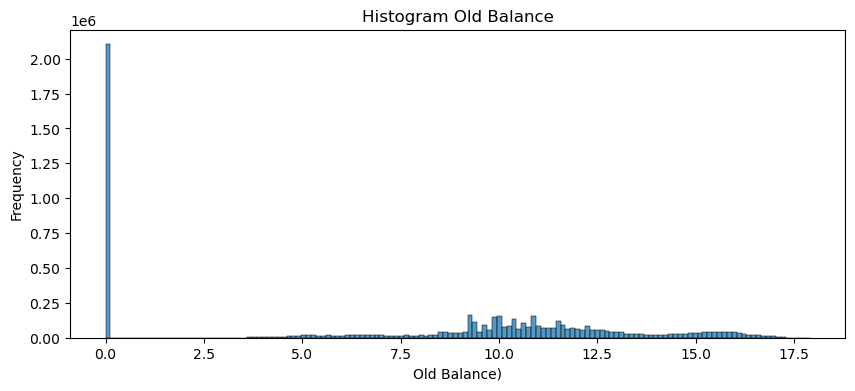

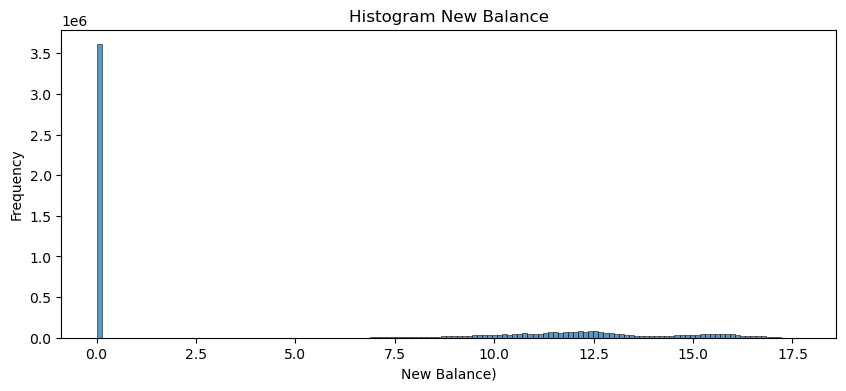

In [ ]:
#histogram of old balances 
plt.figure(figsize=(10, 4))
sns.histplot(np.log1p(df['oldbalanceOrg']))#log1 helps with 0 values 
plt.title('(Histogram Old Balance')
plt.xlabel('Old Balance)')
plt.ylabel('Frequency')#title 
plt.show()


#histogram of new balances 
plt.figure(figsize=(10, 4)) #fig size
sns.histplot(np.log1p(df['newbalanceOrig'])) #log1 helps with 0 values 
plt.title('Histogram New Balance')
plt.xlabel('(New Balance)') #title
plt.ylabel('Frequency') #title 
plt.show()



Both distributions are heavily skewed to the right, with most balances concentrated at 0 and only a small number of accounts showing significantly higher balances. This pattern could possibly indicate financial fraud. If many new and old balances are at zero, fraud may be happening. The zeros are still very prominent, even after using log1p in my code to reduce the impact of extreme values and make the graph more readable.

I then wanted to explore the relationships between amount, old balance (origin), and new balance (origin). I created a new column called balance_difference, which calculates the difference between oldbalanceOrg and newbalanceOrig. My thinking was that if the transaction is valid, this difference should equal the amount. If there's a mismatch, it could be a sign of fraud or some kind of irregularity in the transaction.

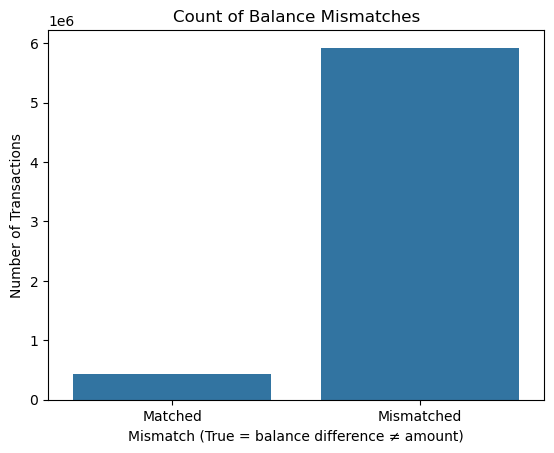

In [126]:
df['mismatch'] = df['balance_difference'] != df['amount']
sns.countplot(x='mismatch', data=df)
plt.title('Count of Balance Mismatches')
plt.xlabel('Mismatch (True = balance difference ≠ amount)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Matched', 'Mismatched'])
plt.show()

I do think this new column is interesting and worth keeping in the cleaned dataset. To dig deeper, I filtered the mismatched transactions by fraud and calculated the percentage that were actually flagged as fraudulent. And counted how often these mismatches occurred across both fraud and non-fraud cases. Surprisingly, none of the mismatched transactions were labeled as fraud, which I didn’t expect at all.

In [ ]:
# Calculate the difference between original old balance and new balance
df['balance_difference'] = df['oldbalanceOrg'] - df['newbalanceOrig']
mismatch_count = (df['balance_difference'] != df['amount']).sum() #count of transaction were amount is not equal
print("Balance difference and amount mismatches:", mismatch_count)
#This creates a new boolean column 
df['mismatch'] = df['balance_difference'] != df['amount']
# boolean mask column for transactions where amount doesn't match balance change
fraud_mismatches = df[(df['mismatch'] == True) & (df['isFraud'] == 1)].shape[0]
# total number of mismatched transactions
total_mismatches = df['mismatch'].sum()  
#percentage of fraud in mismatch
fraud_percent = (fraud_mismatches / total_mismatches) * 100
print(f"Percentage of mismatched transactions that are fraud: {fraud_percent:.2f}%")


Balance difference and amount mismatches: 5922109
Percentage of mismatched transactions that are fraud: 0.00%


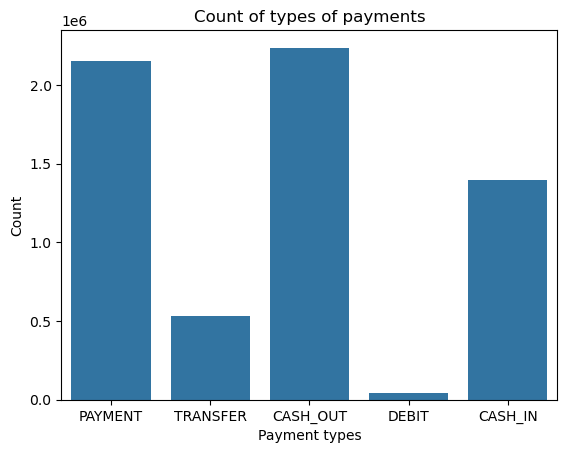

In [ ]:
#count plot of payment types
sns.countplot(data=df, x='type')
plt.xlabel('Payment types') #labels
plt.ylabel('Count')
plt.title('Count of types of payments')#graph title 
plt.show()


I also analyzed the distribution of transaction types. Most transactions are classified as Cash out, followed by Payment and Cash in. Debit transactions were the least frequent, followed by Transfer.

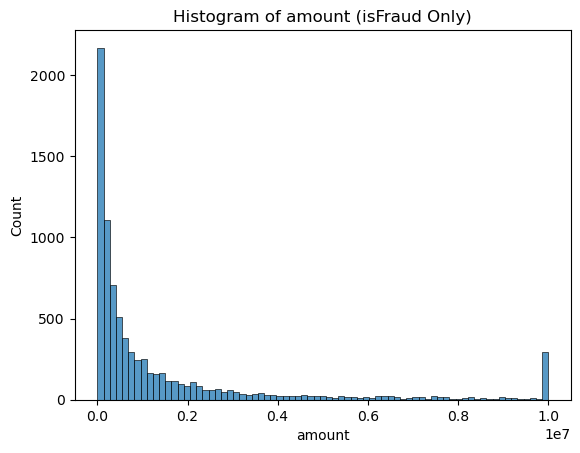

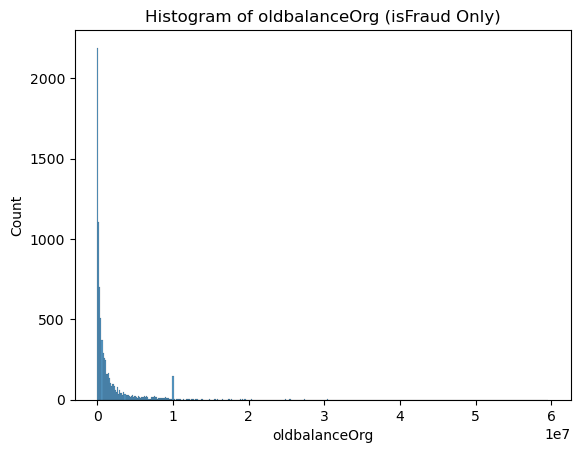

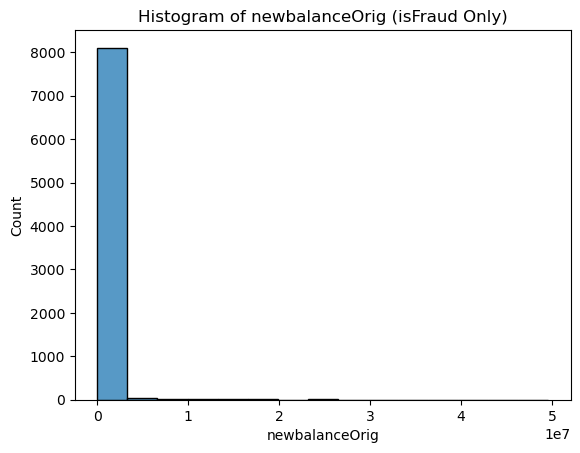

In [ ]:
#filter out only fraudulent transactions in the IsFraud column 
isFraud_df = df[df['isFraud'] == 1] 
#Columns being used to analyze fraud 
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
#Histogram of features 
for feature in features:
    sns.histplot(data=isFraud_df, x=feature) #plot feaures
    plt.xlabel(feature) #title, and label 
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature} (isFraud Only)')
    plt.show()

To better understand the distribution of transaction values, I plotted histograms for amount, oldbalanceOrg, and newbalanceOrig. All three features showed strong right-skewness, with most transactions involving smaller amounts and a few extreme outliers representing very large transactions.

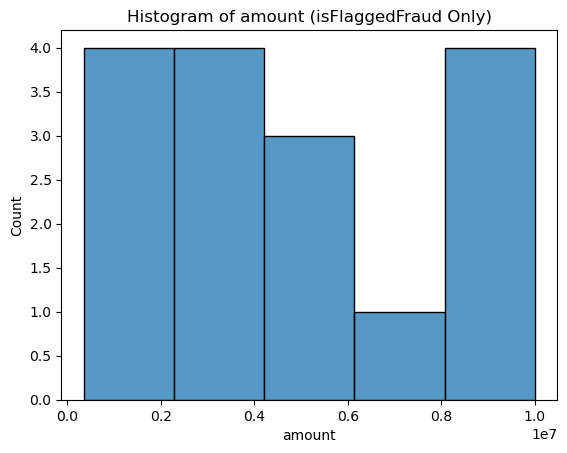

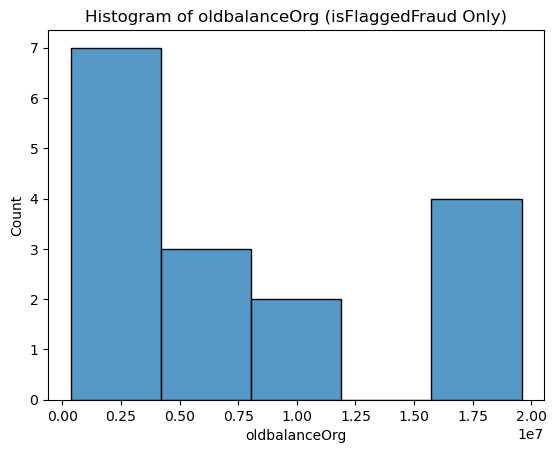

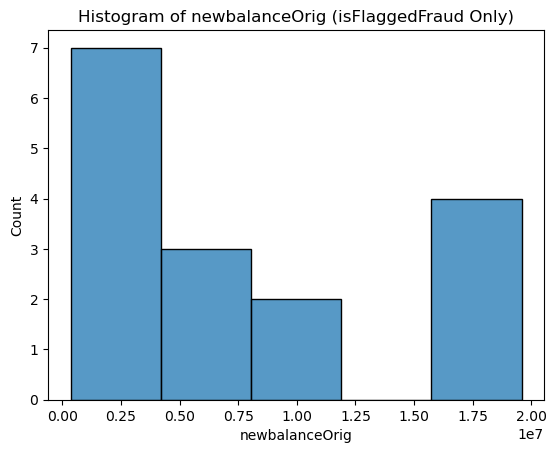

In [ ]:
#filter out only fraudulent transactions in the isFlaggedFraud column 
flaggedFraud = df[df['isFlaggedFraud'] == 1] 
#Columns being used to analyze fraud 
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
#Histogram of features 
for feature in features:
    sns.histplot(data=flaggedFraud, x=feature,)
    plt.xlabel(feature)
    plt.ylabel('Count')#title, and label 
    plt.title(f'Histogram of {feature} (isFlaggedFraud Only)')
    plt.show()

I also examined the isFlaggedFraud column using a histogram. As expected,a  majority of transactions were not flagged by the system, with only a handful marked as potentially fraudulent. this would mean flaggled transactions are  extremely rare, and suggests that the system of flagging is weak.
The histogram for flagged fraud shows two spikes—one for smaller amounts and one for larger ones. Both the old and new origin balances are right-skewed, mostly under 2 million, with a big cluster near zero. This tells me that a lot of these flagged transactions either emptied the account or caused a big drop in the balance.

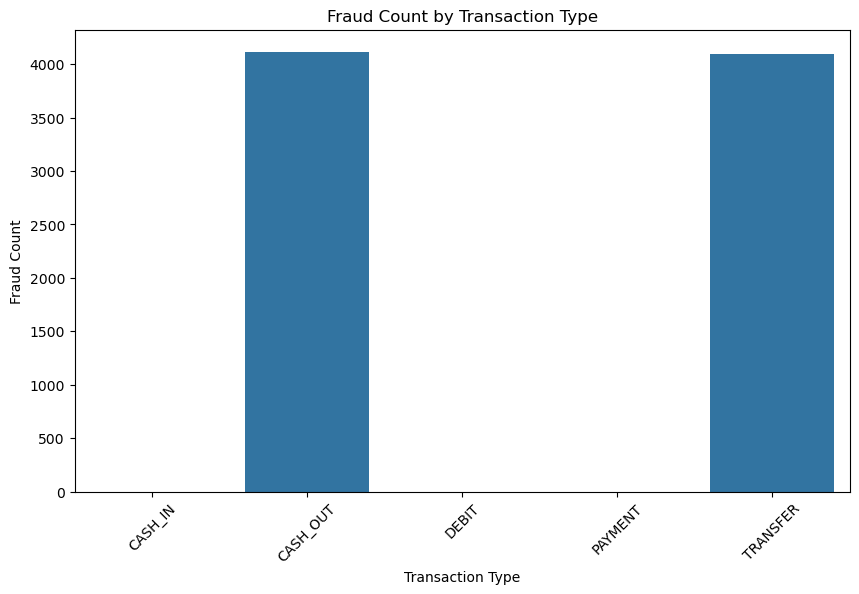

In [28]:
# Calculate total fraud counts for each transaction type
fraud_by_type = df.groupby('type')['isFraud'].sum()
plt.figure(figsize=(10, 6)) #figure size
# Generate bar plot of fraud counts by transaction type
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.xlabel('Transaction Type')# Labels and titles
plt.ylabel('Fraud Count')
plt.title('Fraud Count by Transaction Type')
plt.xticks(rotation=45) 
plt.show()

This bar chart shows that fraud only happens in CASH_OUT and TRANSFER transactions. Both have about the same number of fraud cases, while CASH_IN, PAYMENT, and DEBIT have none. This is important because it shows fraud is only committed when money is being moved or taken out, which makes these two transaction types really important to focus on.

# Bivariate Exploratory Analysis

In [83]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'diffencence_balance', 'deltaOrig',
       'log_oldbalanceOrg', 'log_newbalanceOrig', 'transaction_difference',
       'origin_balance_change', 'origin_balance_mismatch',
       'balance_difference', 'mismatch'],
      dtype='object')

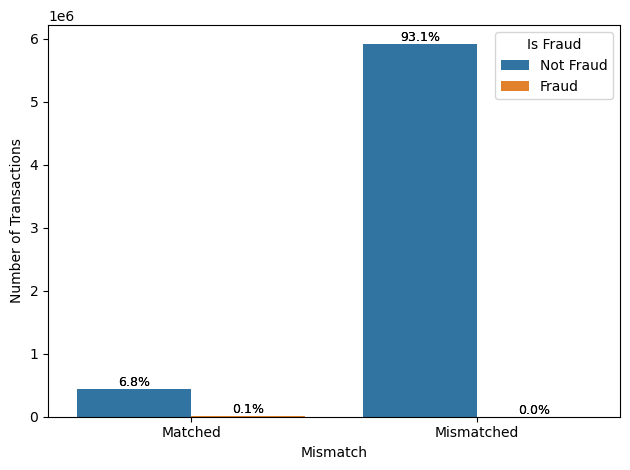

In [128]:
# Create countplot comparing mismatch status with fraud classification
ax = sns.countplot(data=df, x='mismatch', hue='isFraud')
## titles and descriptive label
plt.xlabel('Matched and Mismatch transactions')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Matched', 'Mismatched'])
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
ax = sns.countplot(data=df, x='mismatch', hue='isFraud')
plt.xlabel('Mismatch') #labels
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Matched', 'Mismatched'])
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
# Calculate and display percentages on each bar
total = len(df)
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        percent = f"{100 * height / total:.1f}%"
        ax.text(bar.get_x() + bar.get_width()/2, height, percent,
                ha='center', va='bottom', fontsize=9)
# Adjust layout
plt.tight_layout()
plt.show()




This graph shows what I found in the univariate analysis, and the outcome was definitely unexpected. You’d think mismatched balance behavior might point to fraud, but in this dataset, it’s the opposite 0% of the mismatched transactions are fraud. Even among the matched ones, only about 0.1% are fraud, which also shows just how small and rare the fraud cases really are.

/opt/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 81.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/seaborn/cat

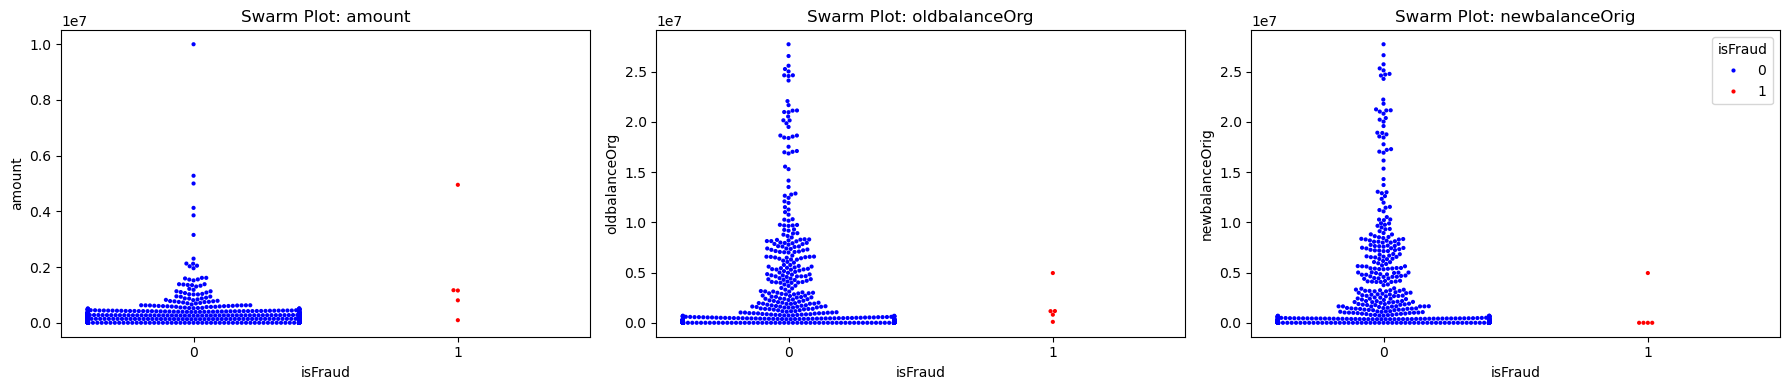

In [ ]:
# Define features 
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
# Color mapping for fraud/non-fraud points
fraud_colors = {0: 'blue', 1: 'red'}
sample_df = df.sample(n=2000, random_state=42)
plt.figure(figsize=(18, 4))
# Generate swarm plots
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i) #create subplot
    sns.swarmplot(data=sample_df, x='isFraud', y=feature, hue='isFraud', palette=fraud_colors, size=3)
    plt.xlabel('isFraud')
    plt.ylabel(feature)
    plt.title(f'Swarm Plot: {feature}')
    plt.legend().remove() 
# axis labels and title
plt.tight_layout()
plt.legend(title='isFraud', loc='upper right')
plt.show()

The swarm plots reveal clear behavioral differences between fraudulent and non-fraudulent transactions. Fraud cases typically involve higher transaction amounts, originate from mid-range account balances, and often leave the account with a zero or near-zero balance. These patterns support the importance of features like amount and engineered metrics such as balance_difference in building effective fraud detection models.

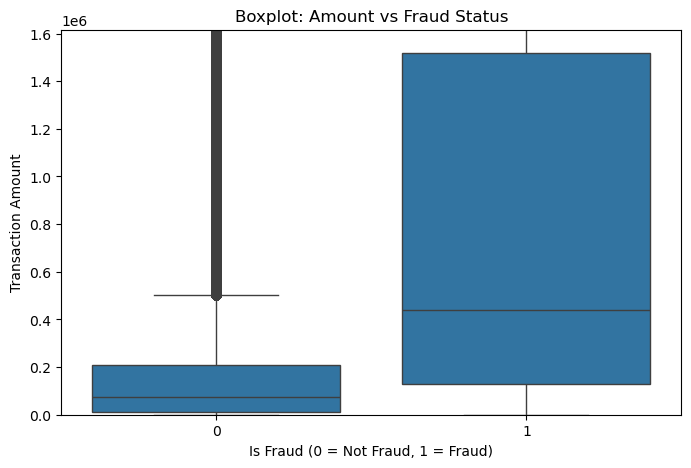

In [20]:
plt.figure(figsize=(8, 5)) #fig size 
# boxplot comparing transaction amounts by fraud status
sns.boxplot(data=df, x='isFraud', y='amount') 
plt.title('Boxplot: Amount vs Fraud Status')#tilte and label
plt.xlabel('Is Fraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.ylim(0, df['amount'].quantile(0.99)) # quantile 0.99 handles outlier
plt.show()

Non-fraud transactions usually have smaller amounts, with most under 100K, though there are some big outliers. To clean that up, I used quantile(0.99) to cap the extreme values and make the plot easier to read. Even after that, fraud cases still stand out with much higher amounts, which backs up what I saw in the swarm plot and confirms that amount is a strong feature for spotting fraud.

/opt/miniconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


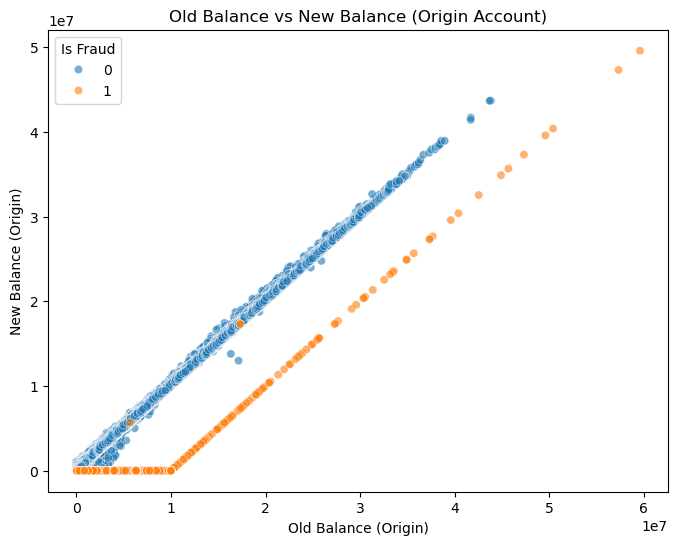

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', alpha=0.6)
plt.title('Old Balance vs New Balance (Origin Account)')
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')
plt.legend(title='Is Fraud')
plt.show()

This plot shows a clear difference in behavior. Non-fraud transactions follow a normal balance flow, while fraud cases usually end with the origin account being emptied. This backs up what I saw earlier and shows that features like balance_difference or a flag for “account drained” could be useful in spotting fraud.

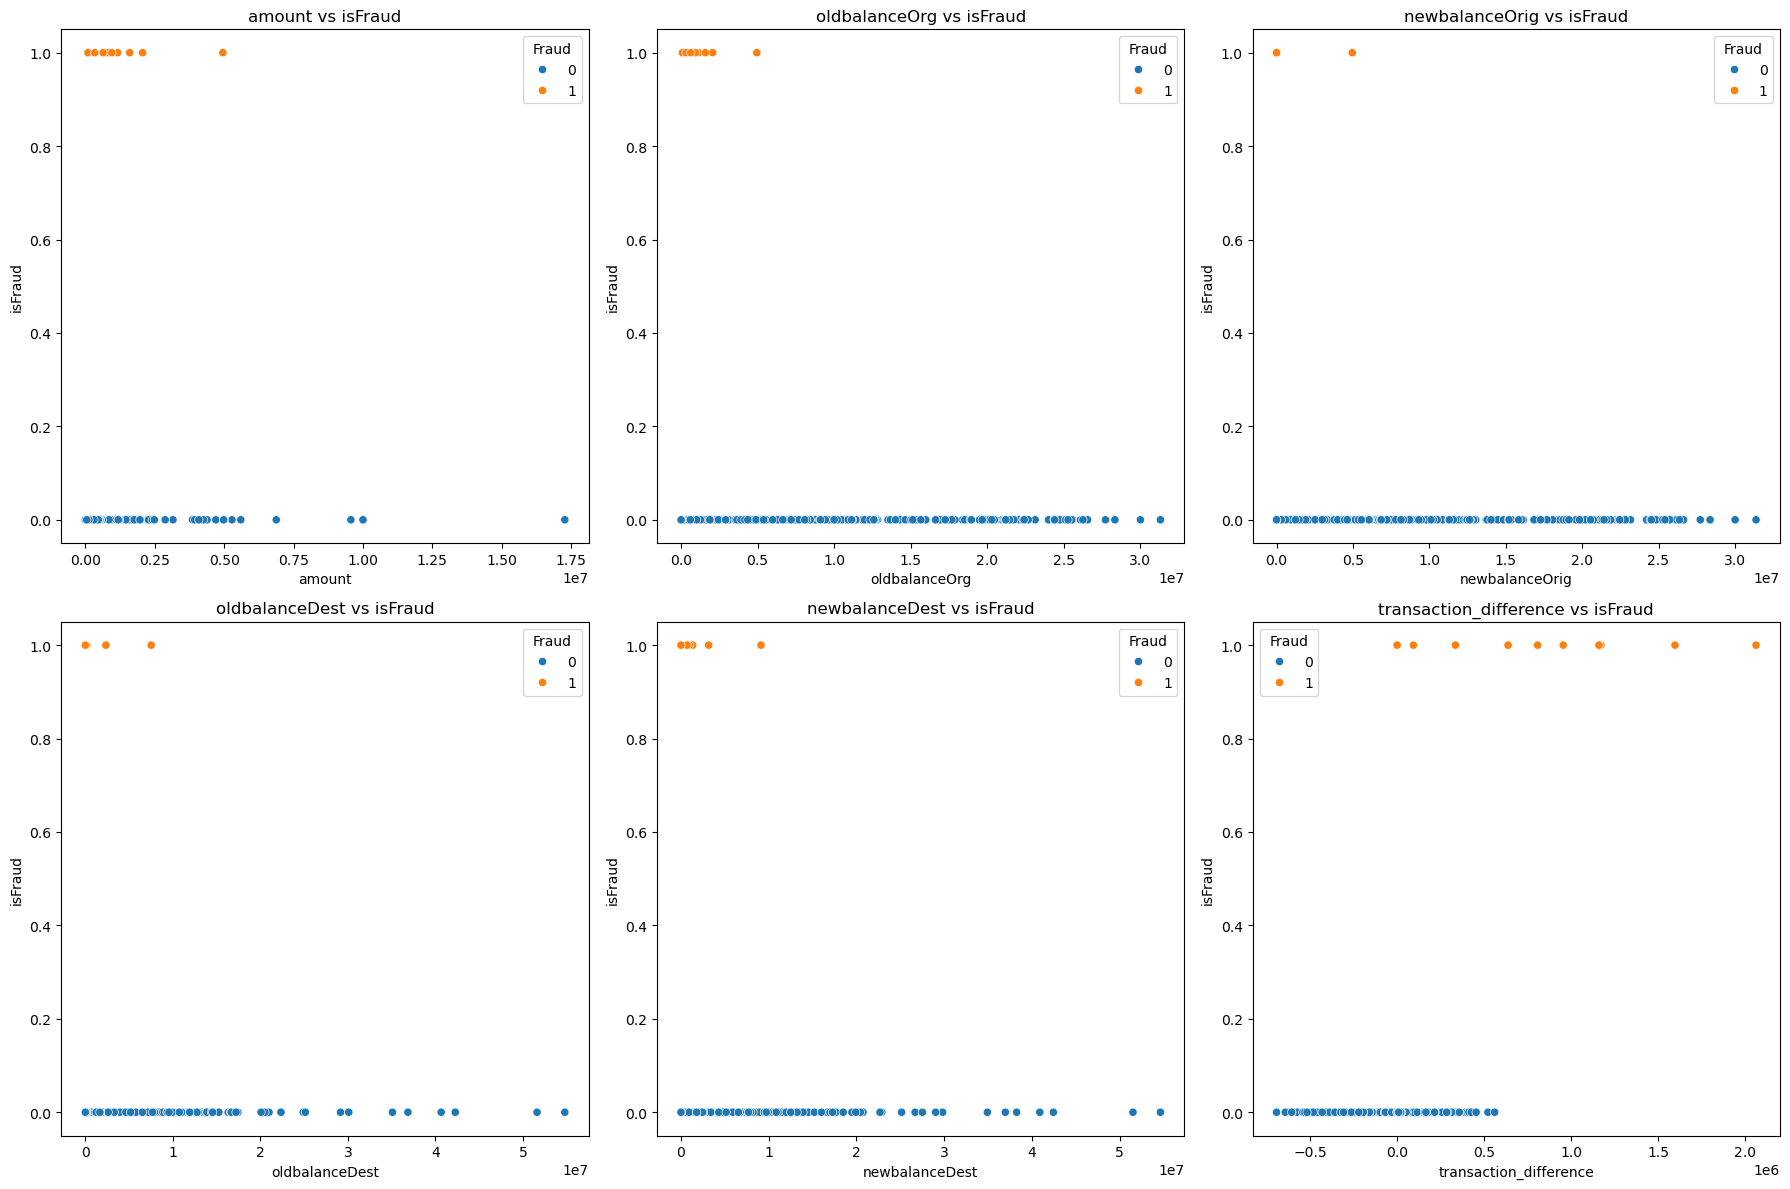

In [42]:
#features used for graph
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'transaction_difference']
#new transaction difference column 
df['transaction_difference'] = df['oldbalanceOrg'] - df['newbalanceOrig']
# sample size =, easier to plot 
sample_df = df.sample(n=5000, random_state=42)
fraud_colors = {0: 'blue', 1: 'red'}
plt.figure(figsize=(18, 12))#fig size
for i, column in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=sample_df, x=column, y='isFraud', hue='isFraud')
    plt.title(f"{column} vs isFraud") #title and label 
    plt.xlabel(column)
    plt.ylabel("isFraud")
    plt.legend(title="Fraud")
plt.tight_layout()
plt.show()

These scatter plots between fraudulent and non-fraudulent transactions across key financial features. Fraudulent cases are typically associated with higher transaction amounts, moderate origin balances, and post-transaction balances close to zero, suggesting account draining. Destination accounts involved in fraud tend to start with low balances, and the transaction_difference feature shows a distinct separation, with fraud clustering at high positive values.

# Multivariate Exploratory Analysis

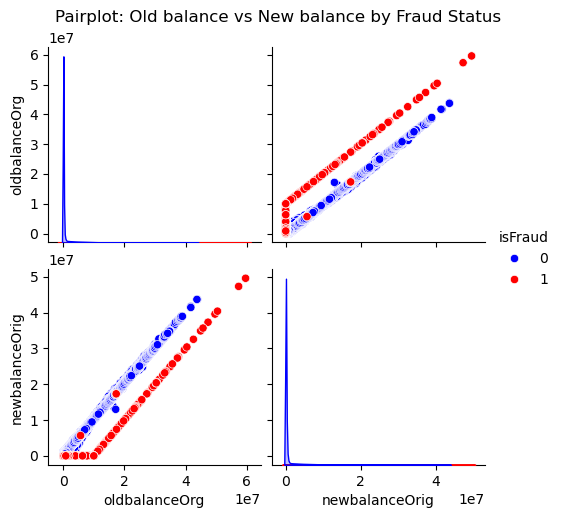

In [114]:
#pair plot
pairplot_data = df[['oldbalanceOrg', 'newbalanceOrig','isFraud']]
sns.pairplot(pairplot_data, hue='isFraud', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot: Old balance vs New balance by Fraud Status', y=1.02)
plt.show()

This pairplot compares oldbalanceOrg and newbalanceOrig while distinguishing transactions by fraud status. Fraudulent transactions (red) often form a distinct pattern where old balances are high, but new balances drop sharply, indicating account draining. Non-fraudulent transactions (blue) follow a more consistent linear trend, suggesting expected balance changes after a transaction. The diagonal clustering in both fraud and non-fraud shows a correlation between old and new balances, but fraud cases tend to fall on a lower slope, reinforcing the idea that fraud typically involves removing most or all of the funds. This visual strongly supports the use of balance-based features for detecting fraudulent behavior.

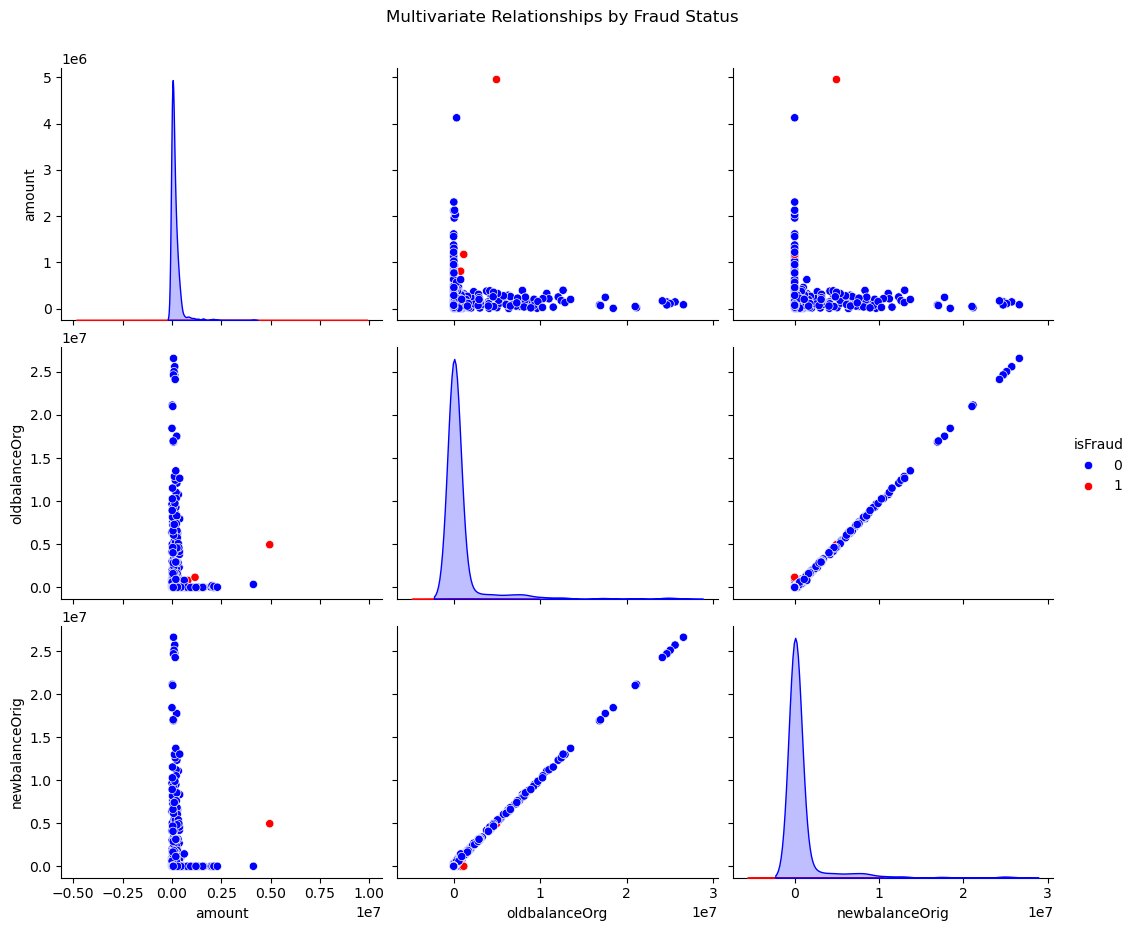

In [119]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']
sample_df = df[features].sample(n=1000, random_state=42)

# Increase plot size: height per subplot and aspect ratio
sns.pairplot(sample_df, hue='isFraud', palette={0: 'blue', 1: 'red'}, height=3, aspect=1.2)

plt.suptitle("Multivariate Relationships by Fraud Status", y=1.03)
plt.show()

When I looked at this pairplot for fraudulent transactions focusing on transactional value features, I noticed diagonal patterns between amount, old balance (origin), and new balance (origin). It looks like in most of these cases, the entire balance is being taken out - the amount is almost equal to the old balance (origin), and the new balance (origin) drops to zero. The new balance (origin) histogram is heavily right-skewed, with a dominant spike at 0, which could mean that many origin accounts were left with no funds after the transaction. Most of the fraud involves smaller amounts, but there are a few big outliers. Overall, it seems like there's a clear pattern of accounts being drained completely.

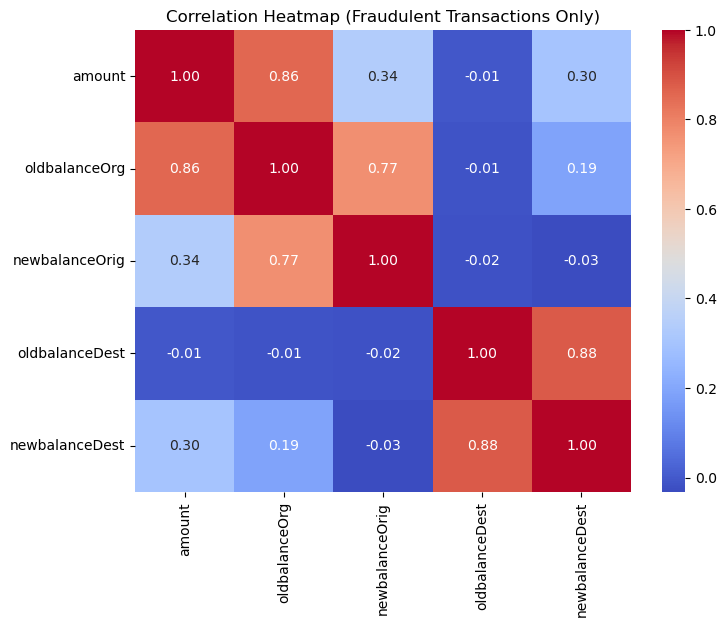

In [111]:
#correlation heatmap of fraudulent transactions
fraud_df = df[df['isFraud'] == 1]  #filtering fraud transaction
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'] #features for heat map
corr = fraud_df[features].corr()
plt.figure(figsize=(8, 6)) #size plot 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Fraudulent Transactions Only)") #title
plt.show()

For my final multivariate graph, I created a correlation heatmap focusing exclusively on fraudulent transactions again while also including the destination features. I wanted to specifically examinine the relationships between the transaction amount, origin account balances. The goal was to get a deepter understanding how these features relate to each other when fraud occurs.

The heatmap reveals a strong positive correlation between the transaction amount, old balance (origin), and new balance (origin). This suggests that  fraudulent transactions might involve accounts with higher starting balances.

Additionally, I observed a high correlation of 0.88 between the old balance (destination) and the new balance (destination), which may indicate that fraud often occurs when funds are actively being moved between accounts.